<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# autoreload updated and newly installed packages
# without having to restart Jupyter kernel
%load_ext autoreload
%autoreload 2
# Some little interaction with matplotlib,
# although this botebook tries to only use plotly.
%matplotlib inline                
# Avoid using Jedi for faster autocomplete (tab)
%config Completer.use_jedi = False

In [2]:
# Standard imports
import datetime
import platform
import os
import sys
from typing import List
# Non-standard imports
import matplotlib
import matplotlib.pyplot as plt
import numba as nb
import numpy as np
import plotly.graph_objs as go
# py-fatigue import
import py_fatigue as pf
# Paths of this tutorial and of the data
TUTORIAL_PATH = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(TUTORIAL_PATH, "Data")
if not TUTORIAL_PATH in sys.path:
    sys.path.append(TUTORIAL_PATH)
np.set_printoptions(threshold=sys.maxsize)

In [3]:
print(f"Platform: {platform.platform()}")
print(f"Python version: {sys.version}")
print(f"py-fatigue version: {pf.styling.TermColors.CBOLD}{pf.__version__}")

print(f"{pf.styling.TermColors.CWHITEBG}\
{pf.styling.TermColors.CBOLD}\
{pf.styling.TermColors.CBLUE}")
      
print(f"DATA_PATH = {DATA_PATH}")
print(f"TUTORIAL_PATH = {TUTORIAL_PATH}")

print(f"{pf.styling.TermColors.CEND}")

Platform: Linux-5.15.0-52-generic-x86_64-with-glibc2.35
Python version: 3.9.7 (default, Sep 20 2022, 16:21:01) 
[GCC 11.2.0]
py-fatigue version: 1.2.0

DATA_PATH = /home/pd/Python/Packages/py-fatigue/Data
TUTORIAL_PATH = /home/pd/Python/Packages/py-fatigue



In [4]:
plt.rcParams["figure.figsize"] = (7, 3.5)
plt.rcParams["font.family"] = ["sans"]
plt.rcParams["font.size"] = 10
plt.rcParams["lines.markersize"] = 3
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linestyle"] = "-"
plt.rcParams["grid.color"] = "#DDDDDD"
plt.rcParams["grid.linestyle"] = "-"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["ytick.left"] = False
plt.rcParams["ytick.labelleft"] = True

In [5]:
# pf.ParisCurve??

In [6]:
SIF = np.linspace(1,2500, 300)
SLOPE_1 = np.array([2.88, 8.16])
INTERCEPT_1 = np.array([1.21E-16, 3.98E-29])
SLOPE_2 = np.array([8.16, 2.88])
INTERCEPT_2 = np.array([1.21E-26, 3.98E-13])
SLOPE_3 = np.array([8.16])
INTERCEPT_3 = np.array([1.21E-26])
THRESHOLD = 75.
CRITICAL = 2000.

In [7]:
# SN curves definition
pc_1 = pf.ParisCurve(slope=SLOPE_1, intercept=INTERCEPT_1, norm="The norm",
                     environment="Environment", curve="nr. 1")
pc_2 = pf.ParisCurve(slope=SLOPE_1, intercept=INTERCEPT_1,threshold=THRESHOLD,
                     critical=CRITICAL, norm="The norm",
                     environment="Environment", curve="nr. 2")

In [8]:
# SN curves definition
pc_3 = pf.ParisCurve(slope=SLOPE_3, intercept=INTERCEPT_3, norm="The norm",
                     environment="Environment", curve="nr. 3")
pc_4 = pf.ParisCurve(slope=SLOPE_2, intercept=INTERCEPT_2,threshold=THRESHOLD,
                     critical=CRITICAL, norm="The norm",
                     environment="Environment", curve="nr. 4")

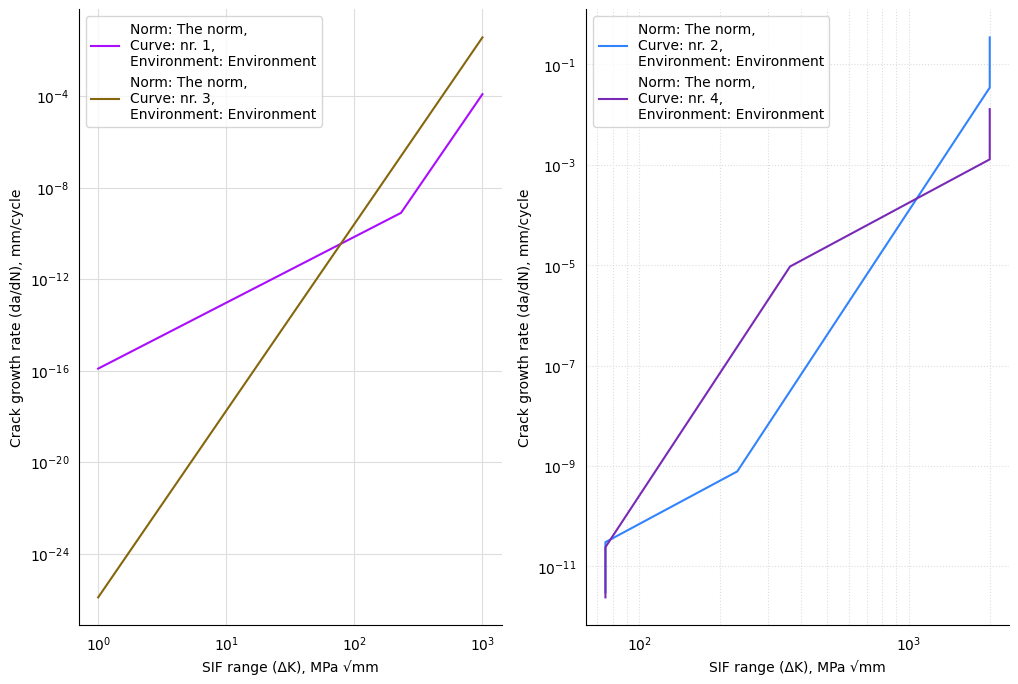

In [9]:
fig, axs = plt.subplots(1,2, figsize=(12, 8))
pc_1.plot(fig=fig, ax=axs[0],)
pc_3.plot(fig=fig, ax=axs[0],)
pc_2.plot(fig=fig, ax=axs[1],)
pc_4.plot(fig=fig, ax=axs[1],)
axs[0].legend()
axs[1].legend()
plt.show()

## Crack propagation analysis

### Constant load

In [10]:
max_ = 150
scale_ = [1, 2/3, 4/7, 1/2, 3/7]
_scale = scale_[0]

#### Divided cycles

In [11]:
cd = pf.CycleCount(
    count_cycle=np.ones(10000000),
    stress_range=max_ * np.ones(10000000),
    mean_stress=np.zeros(10000000)
)

#### Clustered cycles

In [12]:
cc = pf.CycleCount(
    count_cycle=np.array([10000000.]),
    stress_range=np.array([max_]),
    mean_stress=np.array([0])
)

### Analytical solution

In [13]:
# Renaming Paris constants
m  = slope = pc_3.slope[0]
C  = intercept = pc_3.intercept[0]
Δσ = scf = max_ * _scale
Y  = 1
aⁱ = initial_size = 1
aᶠ = 1e1000
π  = np.pi

In [14]:
# analytical = 2 / (2 - slope) / intercept * np.pi ** (-slope / 2) \
#     * scf ** (-slope) * (-(initial_size ** (1 - slope / 2)))
# print("Analytically integrated Nᶠ:", int(analytical))
Nᶠ = 2 / (2 - m) / C * π ** (-m / 2) * (Y * Δσ) ** (-m) \
    * (- aⁱ ** (1 - m / 2)) if m != 2 else \
    1 / (C * π * (Y * Δσ) ** m) * np.log(aᶠ/aⁱ)
print("Analytically integrated Nᶠ:", int(Nᶠ))

Analytically integrated Nᶠ: 439934


### Numerical solution

#### Geometry

In [64]:
geo = pf.geometry.InfiniteSurface(initial_depth=1.)
geo

InfiniteSurface(
  _id=INF_SUR_00,
  initial_depth=1.0,
)

#### Crack growth

In [65]:
cg = pf.crack_growth.get_crack_growth(
    cc * _scale, pc_3, geo
)
print(f"Cycles to failure: {int(cg.final_cycles)}")

Crack size increased by more than 10x in the last iteration. Stopping calculation.
Cycles to failure: 439944


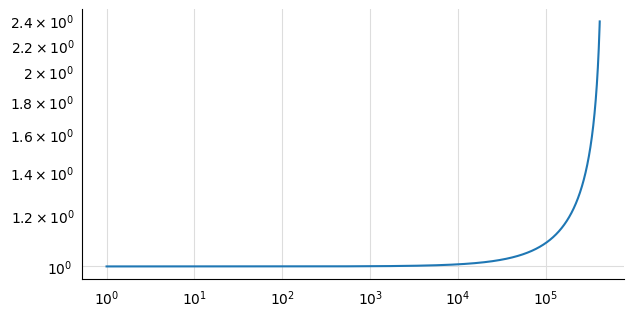

In [73]:
plt.loglog(np.cumsum(cg.count_cycle)[:-30000], cg.crack_depth[:-30000])

In [28]:
cg.crack_depth[-10:]

array([4.74079257e+001, 5.24840636e+001, 6.01713584e+001, 7.35981416e+001,
       1.04138791e+002, 2.30008332e+002, 3.42136455e+003, 1.93911043e+008,
       4.80263849e+027, 6.43427329e+106])

In [27]:
a = [1,2,3,4,5]
a[-1:]

[5]

In [17]:
time = pf.testing.get_sampled_time(10, 1000000)

In [ ]:
data = pf.testing.get_random_data(t=time, range_=250)

In [ ]:
plt.plot(time, data, c="k", lw=0.5)
plt.xlabel("Time, s")
plt.ylabel("Stress, MPa")
plt.show()

In [ ]:
cc = pf.CycleCount.from_timeseries(data=data, time=time, range_bin_width=1.25, mean_bin_width=1.25, name="Signal")

In [ ]:
cc

In [ ]:
# cc.plot_histogram()

In [ ]:
# cg = pf.crack_growth.get_crack_growth(cc, pc_2, 15.)

In [ ]:
# cg.crack_size[-1]

In [ ]:
# plt.loglog(np.cumsum(cc.count_cycle[:len(cg.crack_size)]), cg.crack_size[1:])

In [ ]:
# cg.get_knees_sif

𝜋m∕2 (m∕2 − 1) C(gΔ𝜎i)m ̂ Ni

In [ ]:
pc = pf.ParisCurve(intercept=pc_3.intercept[0], slope=pc_3.slope[0])  #, critical=350, threshold=230)
# pc = pf.ParisCurve(intercept=1e-20, slope=4.1)  #, critical=350, threshold=230)
# pc = pf.ParisCurve(intercept=2e-15, slope=5.1)  #, critical=350, threshold=230)
# pc = pf.ParisCurve(intercept=1e-7, slope=2.000001)  #, critical=350, threshold=230)

In [ ]:
pc

In [ ]:
max_ = 1000
data = np.empty((3000000,))
data[::2] = max_ / 2
data[1::2] = - max_ / 2

In [ ]:
cc = pf.CycleCount(
    count_cycle=np.ones(10000000),
    stress_range=max_ * np.ones(10000000),
    mean_stress=np.zeros(10000000)
)

In [ ]:
cc

In [ ]:
scale_ = [1, 2/3, 4/7, 1/2, 3/7]
scale_ = scale_[-1]
# Renaming Paris constants
m  = slope = pc.slope[0]
C  = intercept = pc.intercept[0]
Δσ = scf = max_ * scale_ 
Y  = 1
aⁱ = initial_size = 1
aᶠ = 1e1000
π  = np.pi

In [ ]:
analytical = 2 / (2 - slope) / intercept * np.pi ** (-slope / 2) \
    * scf ** (-slope) * (-(initial_size ** (1 - slope / 2)))
print("Analytically integrated Nᶠ:", int(analytical))

In [ ]:
Nᶠ = 2 / (2 - m) / C * π ** (-m / 2) * (Y * Δσ) ** (-m) \
    * (- aⁱ ** (1 - m / 2)) if m != 2 else \
    1 / (C * π * (Y * Δσ) ** m) * np.log(aᶠ/aⁱ)
print("Analytically integrated Nᶠ:", int(Nᶠ))

In [ ]:
Nᶠ = 2 / (2 - m) / C * π ** (-m / 2) * (Y * Δσ) ** (-m) \
    * (aᶠ ** (1 - m / 2) - aⁱ ** (1 - m / 2)) if m != 2 else \
    1 / (C * π * (Y * Δσ) ** m) * np.log(aᶠ/aⁱ)
print("Analytically integrated Nᶠ:", int(Nᶠ))

In [ ]:
# geo = pf.HollowCylinder(
#     initial_depth=1.,
#     thickness=80.,
#     height=3000.,
#     outer_diameter=3000.,
#     crack_position="external"
# )

geo = pf.geometry.NoType(initial_depth=1.)
print(geo)

In [ ]:
geo = pf.HollowCylinder(
    initial_depth=1.,
    thickness=1000.,
    height=3000.,
    outer_diameter=3000.,
    crack_position="external"
)

In [ ]:
geo

In [ ]:
cg = pf.crack_growth.get_crack_growth(
    cc * scale_, pc, geo
)
print(f"Cycles to failure: {int(cg.final_cycles)}")

In [ ]:
print(cg.crack_depth)
print(cg.crack_type)
print(cg.crack_geometry)


In [ ]:
cg.crack_growth_curve()

In [ ]:
str(cg)

In [ ]:
cc_ca = pf.CycleCount(
    count_cycle=np.array([9999999.]),
    stress_range=np.array([max_]),
    mean_stress=np.array([0])
)

In [ ]:
cg_ca = pf.crack_growth.get_crack_growth(
    cc_ca * scale_, pc, 1, True
)

In [ ]:
cg_ca.final_cycles

## Testing geometries

In [ ]:
diameter = 10.
initial_depth = 1.
height = 3000

neg_diam = -1 * diameter

geo = pf.geometry.Cylinder(
    diameter=neg_diam,
    initial_depth=initial_depth,
    height=height,
    
)

In [ ]:
geo

## Testing split cycles

In [ ]:
cycles = [0.5, 9, 88, 777, 6666]

In [ ]:
express_mode = False

In [ ]:
if express_mode:
    # Express mode
    splits = [
        10 ** int(np.log10(cycle)) for cycle in cycles
    ]
    splt_cyc = [
        split(int(cycle), n) if int(cycle) > 0 else [cycle]
        for cycle, n in zip(cycles, splits)
    ]
    splt_len = [len(_) for _ in splt_cyc]
else:
    # Non-express mode
    splt_cyc = [
        split(int(cycle), int(cycle)) if int(cycle) > 0 else [cycle]
        for cycle in cycles
    ]
    splt_len = [len(_) for _ in splt_cyc]

count_cycle = np.asarray(
    [float(item) for sublist in splt_cyc for item in sublist]
)

In [ ]:
splits

In [ ]:
splt_len

In [ ]:
sum(count_cycle)

In [ ]:
sum(cycles)

In [ ]:
splits = [10 ** int(np.log10(cycle)) for cycle in cycles]

In [ ]:
[int(cycle / 10) if cycle < 100 else int(cycle / 100) if 100<= cycle <= 1000 else int(cycle / 1000) if 1000 <= cycle <= 10000 else int(cycle/10000) for cycle in cycles]

In [ ]:
def split(n: int, k: int):
    d, r = divmod(n, k)
    return [d + 1] * r + [d] * (k - r)

In [ ]:
[split(cycle, n) for cycle, n in zip(cycles, splits)]

In [ ]:
from numba.experimental import jitclass
from numba import float64

spec = [("alpha", float64)]


@jitclass(spec)
class Foo:
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __str__(self):
        return "Class Foo"
    
    def __repr__(self):
        return "Class Foo Repr"

foo = Foo(1.)

print(str(foo))

In [ ]:
repr(foo)

In [ ]:
foo.__repr__()

In [ ]:
foo

In [ ]:
help(foo.__repr__)

In [ ]:
class TestCrackGrowth:
    """Test the functions related with the crack growth rules, i.e.:
    - Paris' law
    - Walker's law (TO BE IMPLEMENTED)
    """

    @pytest.mark.parametrize("cc_clustered, cc_divided", [(CC_1A, CC_1B)])
    @pytest.mark.parametrize(
        "scf", [800.])
        # "scf", [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
    @given(
        # scf=hy.floats(min_value=10.0, max_value=1000.0),
        # slope=hy.floats(min_value=2.1, max_value=10.0),
        # intercept=hy.floats(min_value=1.0e-30, max_value=1.0e-20),
        initial_size=hy.floats(min_value=1.0, max_value=10.0),
    )
    @pytest.mark.parametrize(
        "slope, intercept", [(3.1, 1.2e-26), (4.2, 1.1e-20), (5.0, 2.0e-15)]
    )
    def test_paris_law_constant_load(
        self,
        cc_clustered: CycleCount,
        cc_divided: CycleCount,
        scf: float,
        slope: float,
        intercept: float,
        initial_size: float,
    ):
        """Test the Paris' law for a constant load."""
        cc_clustered = cc_clustered * scf
        cc_divided = cc_divided * scf
        threshold = scf * np.sqrt(np.pi * initial_size)
        paris_pure = ParisCurve(slope=slope, intercept=intercept)
        paris_threshold = ParisCurve(
            slope=slope, intercept=intercept, threshold=0.99 * threshold
        )
        paris_critical = ParisCurve(
            slope=slope, intercept=intercept, critical=1.01 * threshold
        )

        # fmt: off
        analytical = 2 / (2 - slope) / intercept * np.pi ** (-slope / 2) \
            * scf ** (-slope) * (-(initial_size ** (1 - slope / 2)))
        # fmt: on
        cg_c_ex = damage.get_crack_growth(
            cc_clustered, paris_pure, initial_size, True
        )
        cg_c_no_ex = damage.get_crack_growth(
            cc_clustered, paris_pure, initial_size, False
        )
        cg_d_ex = damage.get_crack_growth(
            cc_divided, paris_pure, initial_size, True
        )

        cg_d_no_ex = damage.get_crack_growth(
            cc_divided, paris_pure, initial_size, True
        )

In [ ]:


# Standard imports
import os
import pytest
import sys

PROJECT_PATH = os.path.dirname(os.getcwd())
if not PROJECT_PATH in sys.path:
    sys.path.append(PROJECT_PATH)
# Non-standard imports
from hypothesis import given, strategies as hy
import numpy as np

from py_fatigue import CycleCount, ParisCurve
import py_fatigue.damage as damage

# PARIS_1A = ParisCurve(slope=8.16, intercept=1.21e-26)
# PARIS_1B = ParisCurve(slope=8.16, intercept=1.21e-26, critical=350)
# PARIS_1C = ParisCurve(slope=8.16, intercept=1.21e-26, threshold=230)



In [ ]:
cc_divided = pf.CycleCount(
    count_cycle=np.ones(50000),
    stress_range=np.ones(50000),
    mean_stress=np.zeros(50000),
)
cc_clustered = pf.CycleCount(
    count_cycle=np.array([50000.0]),
    stress_range=np.array([1]),
    mean_stress=np.array([0]),
)

scf = 800.
s_i = [(3, 1.2e-14), (4.2, 1.1e-17), (5.0, 1.0e-20)]
s_i = list(map(list, zip(*s_i)))
slope = s_i[0][2]
intercept = s_i[1][2]
initial_size = 1
cc_clustered = cc_clustered * scf
cc_divided = cc_divided * scf

In [ ]:
scf * np.sqrt(np.pi * initial_size) * 0.9

In [ ]:

threshold = scf * np.sqrt(np.pi * initial_size)
paris_pure = pf.ParisCurve(slope=slope, intercept=intercept)
paris_threshold = pf.ParisCurve(
    slope=slope, intercept=intercept, threshold=(1.01 * threshold)
)
paris_critical = pf.ParisCurve(
    slope=slope, intercept=intercept, critical=1.2 * threshold
)

# fmt: off
analytical = 2 / (2 - slope) / intercept * np.pi ** (-slope / 2) \
    * scf ** (-slope) * (-(initial_size ** (1 - slope / 2)))
# fmt: on
cg_c_ex = pf.damage.get_crack_growth(
    cc_clustered, paris_pure, initial_size, True
)
cg_c_no_ex = pf.damage.get_crack_growth(
    cc_clustered, paris_pure, initial_size, False
)
cg_d_ex = pf.damage.get_crack_growth(
    cc_divided, paris_pure, initial_size, True
)

cg_d_no_ex = pf.damage.get_crack_growth(
    cc_divided, paris_pure, initial_size, False
)

In [ ]:
cg_th = pf.damage.get_crack_growth(
    cc_clustered, paris_threshold, initial_size
)
cg_cr = pf.damage.get_crack_growth(
    cc_clustered, paris_critical, initial_size
)
cg = pf.damage.get_crack_growth(cc_clustered, paris_pure, initial_size)

# fmt: off
if cg.failure:
    if analytical > 1E4:
        assert cg.final_cycles >= cg_cr.final_cycles
    else:
        assert abs(cg.final_cycles - analytical) < 1000

assert not cg_th.failure

In [ ]:
threshold

In [ ]:
cg_th.sif[0]

In [ ]:
paris_threshold

In [ ]:
assert all((cg_c_ex.failure, cg_d_ex.failure, cg_c_no_ex.failure, \
    cg_d_no_ex.failure)) is False

In [ ]:
analytical

In [ ]:
cg_d_no_ex.final_cycles

In [ ]:
if cg_c_ex.failure:
    assert np.isclose(cg_c_ex.final_cycles, analytical, rtol=0.1)
    assert np.isclose(cg_d_ex.final_cycles, analytical, rtol=0.1)
else:
    assert all((cg_c_ex.final_cycles, cg_d_ex.final_cycles, cg_c_no_ex.final_cycles, cg_d_no_ex.final_cycles)) < analytical
    assert all((cg_c_ex.failure, cg_d_ex.failure, cg_c_no_ex.failure, cg_d_no_ex.failure)) is False

In [ ]:
assert (
    cg_d_ex.final_cycles
    == cg_d_no_ex.final_cycles
    == cg_c_no_ex.final_cycles
)

In [ ]:
cg_d_ex.final_cycles

In [ ]:
cg_c_ex.final_cycles

In [ ]:
foo()